# Simulation de la réponse d'un filtre linéaire
On considère un filtre linéaire de fonction de transfert $\underline{H}$. On désire réaliser plusieurs études du filtre : son comportement fréquentiel et la réponse du filtre à une entrée quelconque. Pour réaliser cette étude sous Python, il convient de travailler sur plusieurs points :
* Les __représentations__ d'un signal quelconque et d'un signal sinusoïdal sous Python: temporelle et fréquentielle
* Le __passage__ d'une représentation à l'autre
* La définition et le tracé des caractéristiques d'__un filtre__
* L'utilisation de ces différentes caractéristiques pour déterminer la __réponse__ d'un filtre

In [1]:
# Importation des bibliothèques scientifiques usuelles
import numpy as np
import matplotlib.pyplot as plt

## Représentations des signaux

### Représentation temporelle

#### Principe
Pour un signal $u$ quelconque, on peut considérer sa représentation temporelle $u(t)$. Sous Python, on peut soit:
* (_représentation continue_) définir une fonction `u` qui prendrait comme argument un flottant `t` et renverra un flottant `ut` tel que $ut = u(t)$
* (_représentation discrète_) définir d'instant $t_k$ auxquels on connait les valeurs $u_k = u(t_k)$. En terme "Python", on va définir deux listes de flottants `tks = [t_k]` et `uks = [u_k]`.

```{margin} On peut très obtenir la deuxième représentation à partir de la première en appliquant la fonction `u` aux valeurs $t_k$ de la liste `tks`.```

La seconde représentations est nécessaire pour les _représentations graphiques sous Python_ et les _données expérimentales_. C'est pourquoi, même après avoir définit une fonction $u$ dans les cas théoriques, on se ramènera à la représentation discrète (cf. remarque dans la marge).

#### Exemple d'implémentation
On présente deux cas :
* une tension sinusoïdale de fréquence 100Hz et d'amplitude 2V.
* un signal créneau de même fréquence et de même amplitude

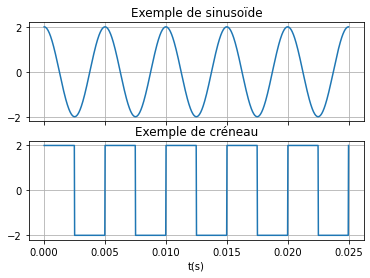

In [2]:
# Représentation continue
def sinus_exemple(t):
    f = 200
    return 2 * np.cos(2 * np.pi * f * t)  # Utilisez les fonctions numpy pour permettre la vectorialisation

def creneau_exemple(t:float):
    f = 200
    T = 1 / f
    if (t / T - np.trunc(t / T)) < 0.5:  # Attention l'utilisation d'une condition ne permettra pas la vectorialisation
        return 2
    else:
        return -2

# Représentation discrète
tks = np.linspace(0, 5 / 200, 1000) # Choix des tk : 1000 points sur 5 périodes.
uks_sinus = sinus_exemple(tks)  # Vectorialisation possible
uks_creneau = np.array([creneau_exemple(t) for t in tks])  # Pas de vectorialisation possible, on passe par la compréhension des listes

# Première utilisation et vérification : tracé temporelle.
f, ax = plt.subplots(2, 1, sharex='col')
ax[0].set_title("Exemple de sinusoïde")
ax[1].set_title("Exemple de créneau")
ax[1].set_xlabel("t(s)")

ax[0].plot(tks, uks_sinus)
ax[1].plot(tks, uks_creneau)

ax[0].grid()
ax[1].grid()
plt.show()


### Représentation fréquentielle
#### Principe

On peut définir un signal par sa décomposition en série de Fourier (ou transformée de Fourier pour les signaux non périodiques), soit l'amplitude $c_u(f)$ associée à chaque sinusoïde fréquence $f$ qui en les sommant redonne le signal $u$. On donne ici uniquement le cas discret:
* Pour chaque fréquence $f_k$ du spectre, on lui associé une amplitude $c_k$ et une phase à l'origine $\phi_k$

Sous Python, on peut donc représenter:
* un seul sinusoïde par un triplet (une liste) `[fk, ck, phik]`
* un signal par une liste de triplet `[[f1, c1, phi1], [f2, c2, phi2], [f3, c3, phi3] ... ]`

```{margin} Contrairement à nos habitudes, la représentation complète (nécessaire pour reconstruire le signal temporel) demande les phase à l'origine des signaux qui ne sont pas forcément nul.```

```{note} Dans le cas des signaux périodiques dont la décomposition est une série (somme infinie), on devra se contenter des N (arbitraires) premiers termes pour décrire un signal.```

#### Implémentation
On crée soit 

In [8]:
spectre_sinus = [200, 2, 0] # Représentation fréquentielle d'un sinusoïde seul de fréquence 200Hz et d'amplitude 2
spectre_modulation = [[1800, 2, 0], [2200, 2, 0]]  # Spectre d'un signal modulé en amplitude

def spectre_creneau_creation(N, ffond):  #Pour le créneau, on va automatiser la création des N harmoniques
    """Création des N premières harmoniques d'un créneau dont le fondamental est ffond"""
    spec = []
    for k in range(N):
        # Note : on met une phase de Pi/2 car on utilisera des cosinus alors que la décomposition suppose des sinus.
        spec.append([(2 * k + 1) * ffond, 4 / (np.pi * (2 * k + 1)), np.pi / 2])
    return spec

spectre_creneau = spectre_creneau_creation(20, 200)
print(spectre_creneau)

[[200, 1.2732395447351628, 1.5707963267948966], [600, 0.4244131815783876, 1.5707963267948966], [1000, 0.25464790894703254, 1.5707963267948966], [1400, 0.18189136353359467, 1.5707963267948966], [1800, 0.1414710605261292, 1.5707963267948966], [2200, 0.11574904952137845, 1.5707963267948966], [2600, 0.09794150344116635, 1.5707963267948966], [3000, 0.08488263631567752, 1.5707963267948966], [3400, 0.07489644380795074, 1.5707963267948966], [3800, 0.06701260761764015, 1.5707963267948966], [4200, 0.06063045451119822, 1.5707963267948966], [4600, 0.055358241075441864, 1.5707963267948966], [5000, 0.05092958178940651, 1.5707963267948966], [5400, 0.0471570201753764, 1.5707963267948966], [5800, 0.043904811887419404, 1.5707963267948966], [6200, 0.04107224337855364, 1.5707963267948966], [6600, 0.038583016507126144, 1.5707963267948966], [7000, 0.03637827270671894, 1.5707963267948966], [7400, 0.03441187958743683, 1.5707963267948966], [7800, 0.03264716781372212, 1.5707963267948966]]


### Passage du fréquentiel au temporel
On va écrire une fonction qui permet d'obtenir la représentation d'un signal $u$ aux temps $t_k$ choisis (représentation discrète) à partir de sa décomposition en série de Fourier. On va écrire deux fonctions:
* `freq_to_sinus(sinus : list[float], tks:list[float]) -> list[float]` qui renvoie la représentation temporelle discrète d'un sinus seul.
* `freq_to_temp(freqs : list[list[float]], tks:list[float]) -> list[float]` qui renvoie la représentation temporelle discrète d'un signal dont le spectre est donné.

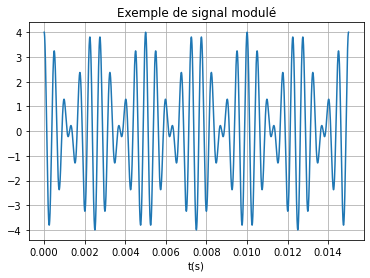

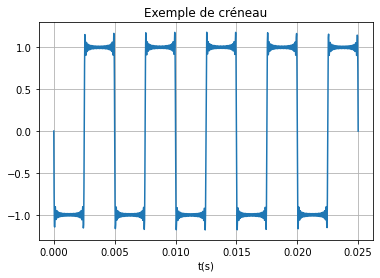

In [9]:
def freq_to_sinus(sinus:list[float], tks:list[float]) -> list[float]:
    """Représentation temporelle du sinus à partir de sa représentation fréquentielle"""
    return sinus[1] * np.cos(2 * np.pi * sinus[0] * tks + sinus[2])

def freq_to_temp(spectre:list[list[float]], tks:list[float]) -> list[float]:
    """Représentation temporelle du signal à partir de sa représentation fréquentielle"""
    uks = np.zeros(len(tks))
    for sinus in spectre:
        uks += freq_to_sinus(sinus, tks)
    return uks

# Essai sur un signal modulé
tks = np.linspace(0, 3 / 200, 10000) # Choix des tk : 1000 points sur 5 périodes.
uks_module_2 = freq_to_temp(spectre_modulation, tks)

f, ax = plt.subplots(1, 1, sharex='col')
ax.set_title("Exemple de signal modulé")
ax.set_xlabel("t(s)")

ax.plot(tks, uks_module_2)

ax.grid()
plt.show()

# Essai sur le créneau
tks = np.linspace(0, 5 / 200, 1000) # Choix des tk : 1000 points sur 5 périodes.
uks_creneau_2 = freq_to_temp(spectre_creneau, tks)

f, ax = plt.subplots(1, 1, sharex='col')
ax.set_title("Exemple de créneau")
ax.set_xlabel("t(s)")

ax.plot(tks, uks_creneau_2)

ax.grid()
plt.show()

```{sidebar} Remarques sur le tracé temporel
_Le créneau ainsi construit n'est pas parfait :_
* _Il y a encore des oscillations sur la parties constantes : elles s'atténueraient en augmentant le nombre d'harmoniques._
* _Il y a un dépassement au moment des basculement valeur haute/ valeur basse : ce phénomène s'accentue par contre avec l'augmentation des harmoniques. En effet, la décomposition en série de Fourier n'est en réalité pas satisfaisante au voisinage de la discontinuité._
```

### Passage du temporel au fréquentiel
#### Principe
Il existe des méthodes mathématiques permettant de déterminer les fréquences et amplitudes des composantes présentes dans le spectre d'un signal $u$ mais elle ne sont pas au programme. Nous allons faire confiance à une fonction de la blbiothèque `numpy.fft`: `fft`.

```{margin} Il est possible que certains $c_i$ soient nuls dans le calcul.```

Elle permet, à partir de la représentation temporelle __discrète__ $u_k = u(t_k)$, de renvoyer les amplitude $c_i$ des fréquences $f_i$ telles que:

$$
f_i = i \times \frac{f_e}{N} \ \ i \in [0; N-1]
$$
```{margin}
$$
f_e = \frac{1}{T_e} = \frac{1}{t_{k+1} - t_{k}}
$$
```
avec $f_e$ la fréquence d'échantillonnage du signal et N le nombre de points dans la représentation du signal ($u_k$).

La fonction est telle que `fft(uks) / N` renvoie un vecteur numpy de taille N contenant une liste de valeurs représentant pour chaque fréquence $f_i$ une nombre complexe dont:
* le module donne l'amplitude de la composante $c_i$
* l'argument donne la phase à l'origine de la composante $\phi_i$
```{margin} `fft(uks) / N` renvoie donc l'amplitude complexe de chaque composante```

#### Première implémentation
Pour créer la représentation fréquentielle `[[f1, c1, phi1], [f2, c2, phi2]... ]` d'un signal dont on connait la représentation temporelle discète `uks`. Il faut donc (`N` est la taille de `uks`):
1. Créer un vecteur de fréquence $f_i = [0, 1, ... N-1] \times \frac{f_e}{N}$
2. Calculer les amplitudes complexes $\underline{c_i}$ par `fft(uks) / N`.
3. En déduire l'amplitude de chaque composante (module) et la phase à l'origine (argument) à partir des $\underline{c_i}$.
4. Regrouper chaque terme dans les listes `[fi, ci, phii]` qu'on regroupera dans une liste de listes.

On va créer une fonction `eval_spec(u, fe)` qui détermine la représentation fréquentielle par cette méthode.

Fréquence d'échantillonage : 4.00e+04 Hz


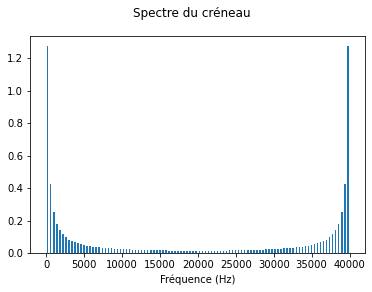

In [10]:
from numpy.fft import fft
def eval_spec(u: list[float], fe:float) -> list[list[float]]:
    N = len(u)  # Nombre de points de mesure
    freqs = np.arange(N) * fe / N  # Fréquence du spectre.
    ci = fft(u) / N  # Amplitudes complexes
    cim = np.abs(ci)  # Amplitudes réelles
    ciphi = np.angle(ci)  # Phases à l'origine
    spec = []
    for i in range(N):  # On va parcourir les fréquences et construire la liste
        spec.append([freqs[i], cim[i], ciphi[i]])
    return spec


# Exemple d'utilisation sur un sinusoïde et sur un créneau
fe = 1 / (tks[1] - tks[0])  # On calcule la fréquence d'échantillonnage à partir des tk
print("Fréquence d'échantillonage : {:.2e} Hz".format(fe))
spectre_creneau_2 = np.array(eval_spec(uks_creneau, fe))  # On le transforme en tableau pour sélectionner une colonne

# On trace le spectre du signal créneau
freqs = spectre_creneau_2[:, 0]
amplis = spectre_creneau_2[:, 1]
f, ax = plt.subplots()
f.suptitle("Spectre du créneau")
ax.set_xlabel("Fréquence (Hz)")
ax.bar(freqs, amplis, width=200, label="Spectre")
plt.show()

#### Implémentation corrigée
Et là, on note un problème : l'existence de haute fréquence qui n'existe pas dans le signal réel. Le problème est associé __au critère de Shannon-Nyquist vu en TP__.  
Sans rentrer dans les détails, on remarque que la fréquence d'échantillonnage est de 40kHz. Donc le critère de Shannon-Nyquist nous dit que seules les fréquences inférieures à 20kHz sont mesurables.  
Les résultats obtenues pour des _fréquences supérieures à $f_e / 2$_ n'ont pas de sens physique (on remarquera qu'elle sont les amplitudes associées sont le symétrique des amplitudes des fréquences _réelles_ ($< f_e / 2$) par rapport à $f_e / 2$, on parle de __repli spectral__).

On va donc modifier le programme `eval_spec` pour ne garder _QUE_ les fréquences inférieures $f_e / 2$ soit la moitié des listes.

```{margin}Dans le cas du créneau, on ne peut le respecter strictement, il faudra surtout que suffisamment de composantes respectent ce critère.```

__Il faudra par contre veiller à ce que la fréquence d'échantillonnage de $u$ soit 2 fois supérieure à toutes les fréquences qui le compose : respectons le critère de Shannon-Nyquist !__

Fréquence d'échantillonage : 4.00e+04 Hz


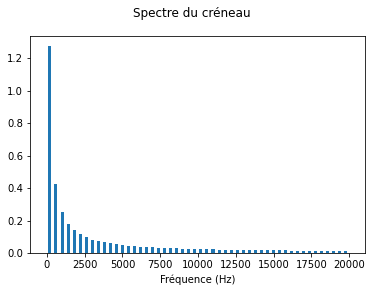

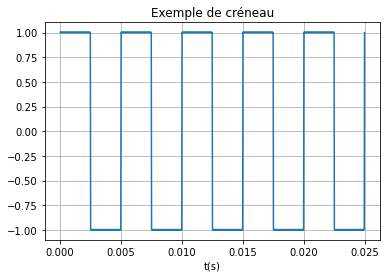

In [11]:
def eval_spec(u: list[float], fe:float) -> list[list[float]]:
    N = len(u)  # Nombre de points de mesure
    freqs = np.arange(N) * fe / N  # Fréquence du spectre.
    ci = fft(u) / N  # Amplitudes complexes
    cim = np.abs(ci)  # Amplitudes réelles
    ciphi = np.angle(ci)  # Phases à l'origine
    spec = []
    for i in range(int(N/2)):  # On va parcourir les fréquences et construire la liste
        spec.append([freqs[i], cim[i], ciphi[i]])
    return spec


# Exemple d'utilisation sur un sinusoïde et sur un créneau
# Essai sur le créneau
fe = 1 / (tks[1] - tks[0])  # On calcule la fréquence d'échantillonnage à partir des tk
print("Fréquence d'échantillonage : {:.2e} Hz".format(fe))
spectre_creneau_3 = np.array(eval_spec(uks_creneau, fe))  # On le transforme en tableau pour sélectionner une colonne

# On trace le spectre du signal créneau
freqs = spectre_creneau_3[:, 0]
amplis = spectre_creneau_3[:, 1]
f, ax = plt.subplots()
f.suptitle("Spectre du créneau")
ax.set_xlabel("Fréquence (Hz)")
ax.bar(freqs, amplis, width=200, label="Spectre")
plt.show()

# On reconstruit le signal temporelle pour vérifier qu'on retombe sur le bon signal
uks_creneau_3 = freq_to_temp(spectre_creneau_3, tks)

f, ax = plt.subplots(1, 1, sharex='col')
ax.set_title("Exemple de créneau")
ax.set_xlabel("t(s)")

ax.plot(tks, uks_creneau_3)

ax.grid()
plt.show()

__On dispose maintenant de plusieurs fonctions utiles pour représenter les signaux et passer d'une représentation à une autre.__ :
* `freq_to_sinus` et `freq_to_temp` permettent de passer du spectre du signal (phase à l'origine incluse) à sa représentation temporelle discrète.
* `eval_spec` permet de passer de la représentation temporelle discrète au spectre du signal.

## Etude d'un filtre
### Etude générale
On va voir comment définir un filtre sous Python et tracer son diagramme de Bode.

```{margin}Un complexe $K j$ sous Python s'écrit `1j * K`.```

Un filtre est défini par sa fonction de transfert (complexe) $\underline{H}(j \omega)$. On va donc représenter un filtre sous Python par __une fonction__ prenant comme argument la pulsation $\omega$ et renvoyant la fonction de transfert complexe calculé en $\omega$.

```{note}On pourra imaginer d'autres arguments (par exemple pour un second ordre, $\omega_0$ et $Q$```

On pourra ensuite tracer son diagramme de Bode:
* `ax.set_xscale('log')` permet de passer en échelle semi-logarithmique
* `np.log10(G)` permet de calculer le logarithme décimal (fonction vectorialisable) de G.
* `np.angle` permet d'obtenir l'argument d'un complexe et `np.abs` le module.
* `np.logspace(1, 5, 1000)` crée un vecteur de 1000 pulsations entre $10^1$ et $10^5 rad/s$ équidistants __sur une échelle logarithmique__ (pratique pour un diagramme de Bode).

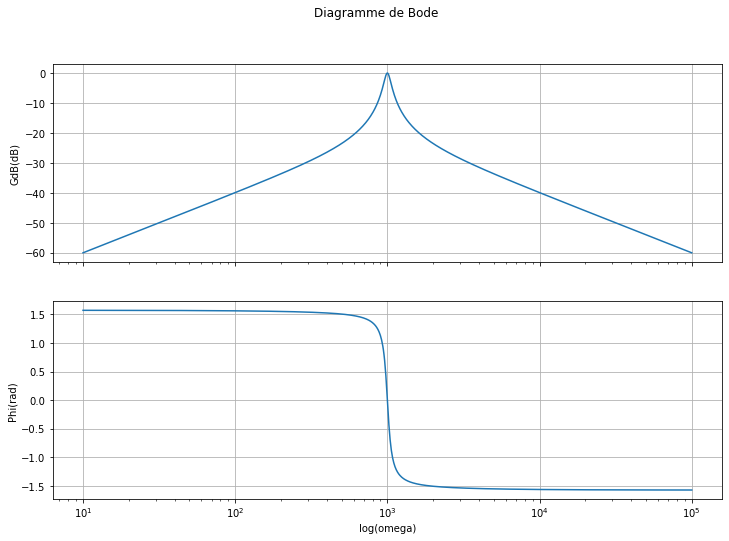

In [12]:
# Exemple de fonction de transfert : un passe-bande d'ordre 2
def passebande(omega):
    omega0 = 1000 # omega0 = 1000 rad/s
    Q = 10
    x = omega/ omega0
    return 1/ (1 + 1j * Q * (x - 1 /x))

# Obtention du gain et de la phase puis tracé du diagramme de Bode
omegas = np.logspace(1, 5, 1000)
hs = passebande(omegas)
gain_reel = np.abs(hs)  # On utilise au maximum la vectorialisation
gain_db = 20 * np.log10(gain_reel)
phase = np.angle(hs)

f, ax = plt.subplots(2, 1, figsize=(12, 8), sharex='col')
f.suptitle("Diagramme de Bode")
ax[1].set_xlabel("log(omega)")
ax[0].set_ylabel("GdB(dB)")
ax[1].set_ylabel("Phi(rad)")
ax[1].set_xscale('log')

ax[0].plot(omegas, gain_db)
ax[1].plot(omegas, phase)

ax[0].grid()
ax[1].grid()
plt.show()

### Réponse d'un filtre
Nous allons écrire une fonction `reponse` qui renvoie, pour une fonction de transfert données et un signal d'entrée donné, la tension de sortie.

__Les filtres agissant dans l'espace fréquentiel, nous allons donner la représentation d'entrée sous forme fréquentielle et nous renverrons le signal de sortie sous sa représentation fréquentielle.__ Les fonctions proposées précédemment permettront le passe au temporel.

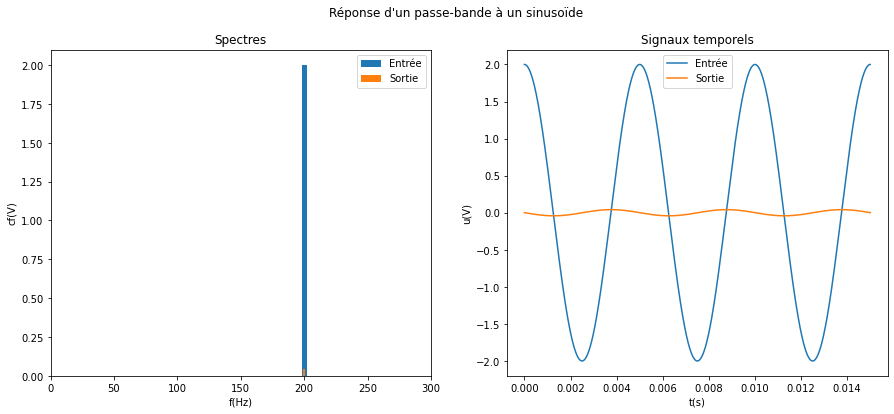

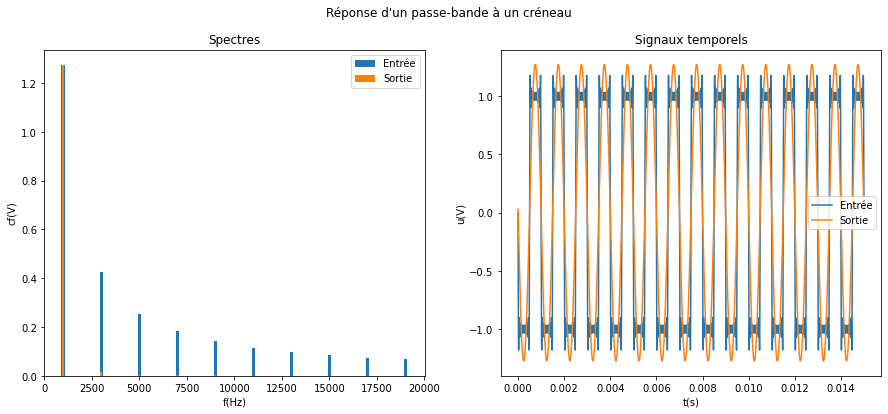

In [13]:
# Définition de la fonction
def reponse(filtre:callable, entree:list[list[float]]) -> list[list[float]]:
    """Renvoie la réponse à un signal entre par un filtre
    Note : callable signifie que l'argument est une fonction."""
    s = []
    for e in entree:
        he = filtre(e[0])
        s.append([e[0], np.abs(he) * e[1], np.angle(he) + e[2]])
    return s

# ---Application à deux signaux : un sinusoïde et un créneau
spectre_entree_sinus = [[200, 2, 0]] # Représentation fréquentielle d'un sinusoïde seul de fréquence 200Hz et d'amplitude 2
spectre_entree_creneau = spectre_creneau_creation(10, 1000)  # On utilise la fonction de création d'un créneau précédent

## On va aussi faire les tracés temporel, on passe donc aux représentations temporelles des signaux précédents
tks = np.linspace(0, 3 / 200, 10000) # Choix des tk : 1000 points sur 5 périodes.
tempo_entree_sinus = freq_to_temp(spectre_entree_sinus, tks)  # Représentation temporelle du sinus seul
tempo_entree_creneau = freq_to_temp(spectre_entree_creneau, tks)  # Représentation temporelle du créneau

## Détermination de la représentation fréquentielle des signaux de sortie
spectre_sortie_sinus = reponse(passebande, spectre_entree_sinus)
spectre_sortie_creneau = reponse(passebande, spectre_entree_creneau)

## Détermination de la représentation temporelle des signaux de sortie
tempo_sortie_sinus = freq_to_temp(spectre_sortie_sinus, tks)  # Représentation temporelle du sinus seul
tempo_sortie_creneau = freq_to_temp(spectre_sortie_creneau, tks)  # Représentation temporelle du créneau

# -- Tracé des évolutions temporelles et spectres des entrées et sorties
## Cas du sinusoïde
f1, ax1 = plt.subplots(1, 2, figsize=(15,6))
f1.suptitle("Réponse d'un passe-bande à un sinusoïde")
ax1[0].set_title("Spectres")
ax1[0].set_xlabel("f(Hz)")
ax1[0].set_ylabel("cf(V)")
ax1[1].set_title("Signaux temporels")
ax1[1].set_xlabel("t(s)")
ax1[1].set_ylabel("u(V)")

ax1[0].bar([e[0] for e in spectre_entree_sinus], [e[1] for e in spectre_entree_sinus], label="Entrée", width=4)
ax1[0].bar([s[0] for s in spectre_sortie_sinus], [e[1] for e in spectre_sortie_sinus], label="Sortie", width=2)
ax1[0].set_xlim([0, 300])
ax1[0].legend()

ax1[1].plot(tks, tempo_entree_sinus, label="Entrée")
ax1[1].plot(tks, tempo_sortie_sinus, label="Sortie")
ax1[1].legend()

plt.show()

## Cas du créneau
f1, ax1 = plt.subplots(1, 2, figsize=(15,6))
f1.suptitle("Réponse d'un passe-bande à un créneau")
ax1[0].set_title("Spectres")
ax1[0].set_xlabel("f(Hz)")
ax1[0].set_ylabel("cf(V)")
ax1[1].set_title("Signaux temporels")
ax1[1].set_xlabel("t(s)")
ax1[1].set_ylabel("u(V)")

ax1[0].bar([e[0] for e in spectre_entree_creneau], [e[1] for e in spectre_entree_creneau], label="Entrée", width=200)
ax1[0].bar([s[0] for s in spectre_sortie_creneau], [e[1] for e in spectre_sortie_creneau], label="Sortie", width=100)
#ax1[0].set_xlim([0, 300])
ax1[0].legend()

ax1[1].plot(tks, tempo_entree_creneau, label="Entrée")
ax1[1].plot(tks, tempo_sortie_creneau, label="Sortie")
ax1[1].legend()

plt.show()